In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset 
Loan_df = pd.read_csv('/Users/shubhammittra/Downloads/loan.csv')

Loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#getting dataset info
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
# check row and cloumns
Loan_df.shape

(39717, 111)

In [8]:
# check null values columns-wise
round((Loan_df.isnull().sum()/Loan_df.shape[0])*100,2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

# Data Cleaning

In [9]:
#create list of unncessary columns having null values more than 90%
unnecessary_colmn=Loan_df.columns[(Loan_df.isnull().sum()/Loan_df.shape[0])*100>90]

In [10]:
#drop uncessary columns
Loan_df=Loan_df.drop(unnecessary_colmn, axis=1)

In [11]:
round((Loan_df.isnull().sum()/Loan_df.shape[0])*100,2)#rechecking the null values

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [12]:
#drop desc , mths_since_last_delinq
Loan_df=Loan_df.drop(['desc','mths_since_last_delinq'], axis=1)

In [13]:
round((Loan_df.isnull().sum()/Loan_df.shape[0])*100,2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [14]:
Loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [15]:
Loan_df['int_rate']=Loan_df['int_rate'].apply(lambda x: x.replace('%',''))#Removing the % and making as an integer

In [16]:
Loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [17]:
Loan_df['int_rate']= Loan_df['int_rate'].astype('float64')

In [18]:
Loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [19]:
Loan_df['emp_length'] = Loan_df['emp_length'].astype("str")

In [20]:
# fetching numerical value form emp_length
Loan_df['emp_length']=Loan_df['emp_length'].apply(lambda x: x.replace('years',''))
Loan_df['emp_length']=Loan_df['emp_length'].apply(lambda x: x.replace('year',''))
Loan_df['emp_length']=Loan_df['emp_length'].apply(lambda x: x.replace('+',''))
Loan_df['emp_length']=Loan_df['emp_length'].apply(lambda x: x.replace('<',''))
Loan_df['emp_length']=Loan_df['emp_length'].apply(lambda x: x.strip())

In [21]:
Loan_df.dropna(subset=['emp_length'],inplace=True)

In [23]:
Loan_df = Loan_df[~(Loan_df['emp_length']=='nan')]

In [24]:
Loan_df['emp_length'] = Loan_df['emp_length'].astype('int64')

In [25]:
Loan_df['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 38642, dtype: int64

In [26]:
#creating list of unnecssary columns
unneccessary_var2 =  ["delinq_2yrs", "earliest_cr_line","inq_last_6mths","open_acc","pub_rec", "revol_util", "total_acc", "total_rec_int","total_rec_prncp", "out_prncp","out_prncp_inv", "total_pymnt", "total_pymnt_inv","revol_bal","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d","application_type",'title', 'url', 'zip_code', 'addr_state','id','member_id']


In [27]:
#dropping unncessary columns
Loan_df = Loan_df.drop(unneccessary_var2, axis=1)

In [28]:
Loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,...,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,...,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,...,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,...,other,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,...,other,17.94,f,0.0,1,0,0.0,0,0.0,0.0


In [29]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38642 non-null  int64  
 1   funded_amnt                 38642 non-null  int64  
 2   funded_amnt_inv             38642 non-null  float64
 3   term                        38642 non-null  object 
 4   int_rate                    38642 non-null  float64
 5   installment                 38642 non-null  float64
 6   grade                       38642 non-null  object 
 7   sub_grade                   38642 non-null  object 
 8   emp_title                   37202 non-null  object 
 9   emp_length                  38642 non-null  int64  
 10  home_ownership              38642 non-null  object 
 11  annual_inc                  38642 non-null  float64
 12  verification_status         38642 non-null  object 
 13  issue_d                     386

In [30]:
# convert loan status to categorical cloumns
Loan_df['loan_status'] = Loan_df['loan_status'].astype('category')
Loan_df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [31]:
# create month and year column from issue_d column
from datetime import datetime
Loan_df['issue_d'] = Loan_df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
Loan_df['month'] = Loan_df['issue_d'].apply(lambda x: x.month)
Loan_df['year'] = Loan_df['issue_d'].apply(lambda x: x.year)

In [32]:
# fetching only fully paid or charged-off
Loan_df = Loan_df[Loan_df['loan_status'] != 'Current']
Loan_df['loan_status'] = Loan_df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
Loan_df['loan_status'] = Loan_df['loan_status'].astype('int32')

In [33]:
Loan_df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [34]:
# default rate
round(np.mean(Loan_df['loan_status']), 2)

0.14

# Univariate Analysis

<AxesSubplot:xlabel='funded_amnt'>

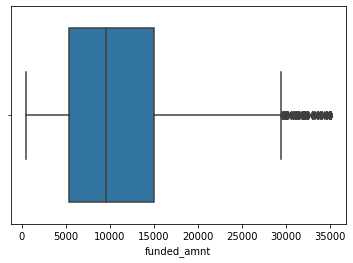

In [38]:
sns.boxplot(Loan_df["funded_amnt"])

<AxesSubplot:xlabel='int_rate'>

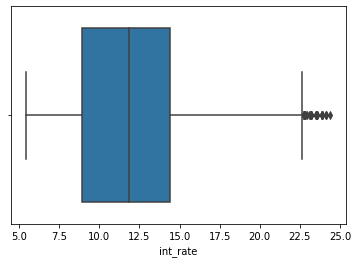

In [39]:
sns.boxplot(Loan_df["int_rate"])

<AxesSubplot:xlabel='loan_amnt'>

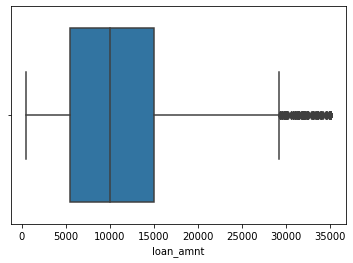

In [43]:
sns.boxplot(Loan_df["loan_amnt"])

<AxesSubplot:xlabel='home_ownership', ylabel='Count'>

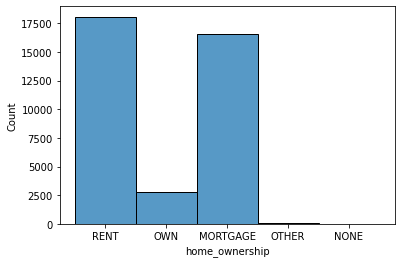

In [49]:
sns.histplot(Loan_df["home_ownership"])

<AxesSubplot:xlabel='grade', ylabel='Count'>

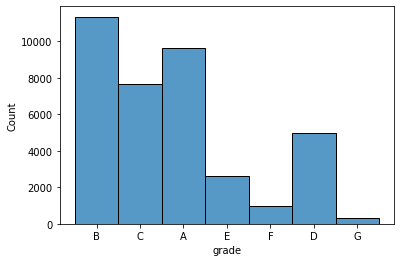

In [50]:
sns.histplot(Loan_df["grade"])

<AxesSubplot:xlabel='sub_grade', ylabel='Count'>

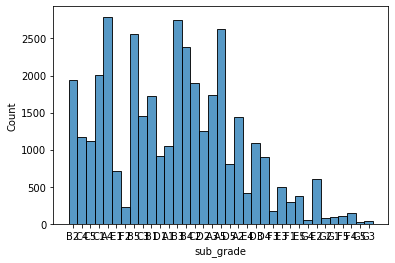

In [51]:
sns.histplot(Loan_df["sub_grade"])

<AxesSubplot:xlabel='verification_status', ylabel='Count'>

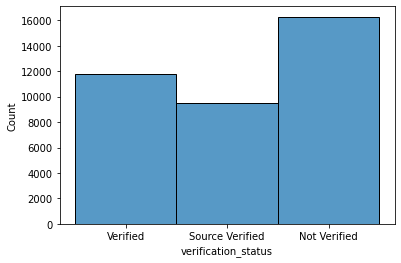

In [52]:
sns.histplot(Loan_df["verification_status"])

<AxesSubplot:xlabel='month', ylabel='Count'>

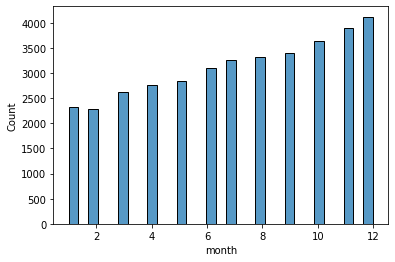

In [53]:
sns.histplot(Loan_df["month"])

<AxesSubplot:xlabel='year', ylabel='Count'>

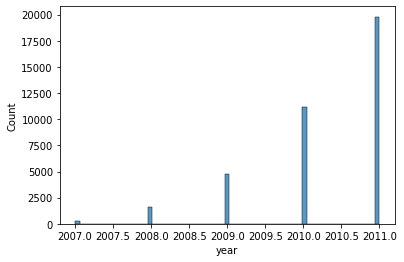

In [54]:
sns.histplot(Loan_df["year"])

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

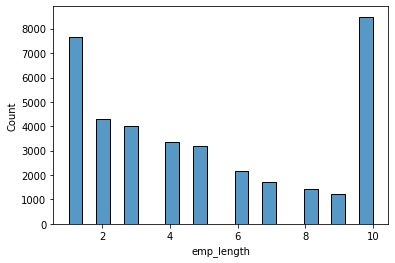

In [55]:
sns.histplot(Loan_df["emp_length"])

<AxesSubplot:xlabel='term', ylabel='Count'>

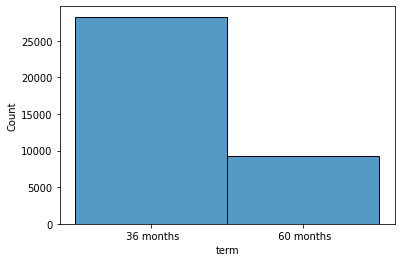

In [56]:
sns.histplot(Loan_df["term"])

# Bivariate Analysis

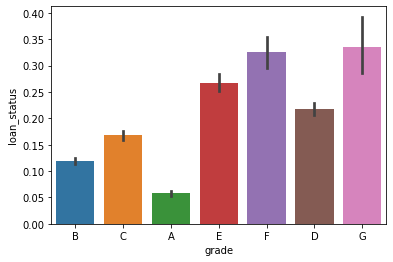

In [57]:
# loan_status vs grade
sns.barplot(x='grade', y='loan_status', data=Loan_df)
plt.show()

<AxesSubplot:xlabel='grade'>

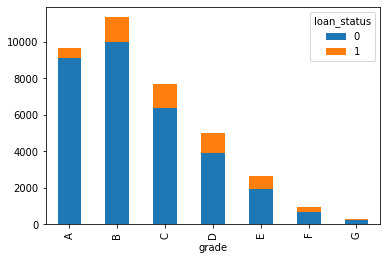

In [58]:
Loan_df.groupby('grade')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)


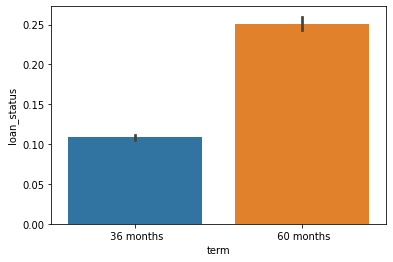

In [59]:
#plotting term
sns.barplot(x='term', y='loan_status', data=Loan_df)
plt.show()

<AxesSubplot:xlabel='term'>

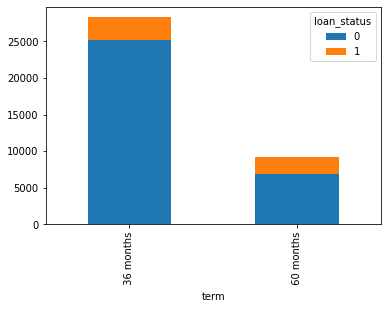

In [60]:
Loan_df.groupby('term')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)

In [61]:
Loan_df.groupby('term')['loan_status'].value_counts()

term        loan_status
 36 months  0              25214
            1               3073
 60 months  0               6931
            1               2326
Name: loan_status, dtype: int64

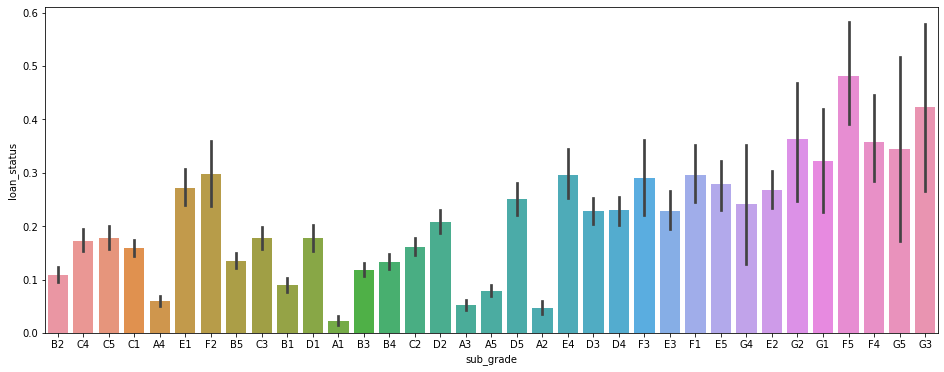

In [62]:
#plotting sub grade
plt.figure(figsize=(16, 6))
sns.barplot(x='sub_grade', y='loan_status', data=Loan_df)
plt.show()

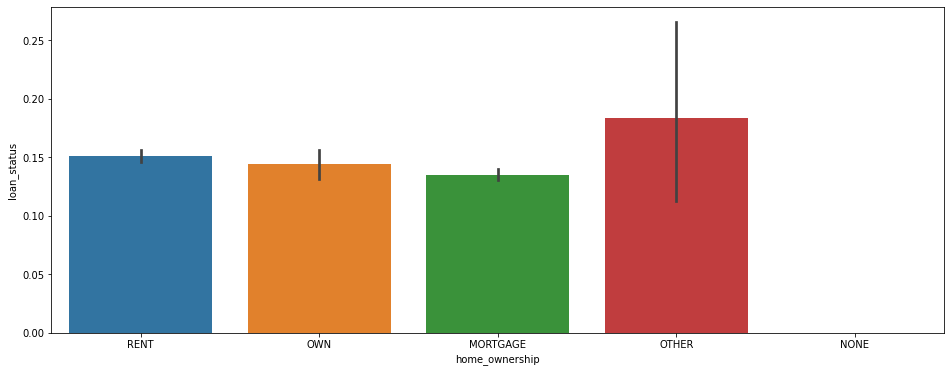

In [63]:
#plotting home ownership
plt.figure(figsize=(16, 6))
sns.barplot(x='home_ownership', y='loan_status', data=Loan_df)
plt.show()

<AxesSubplot:xlabel='home_ownership'>

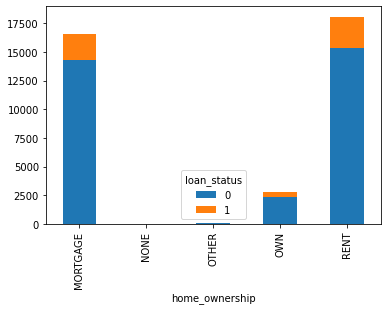

In [65]:
Loan_df.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)

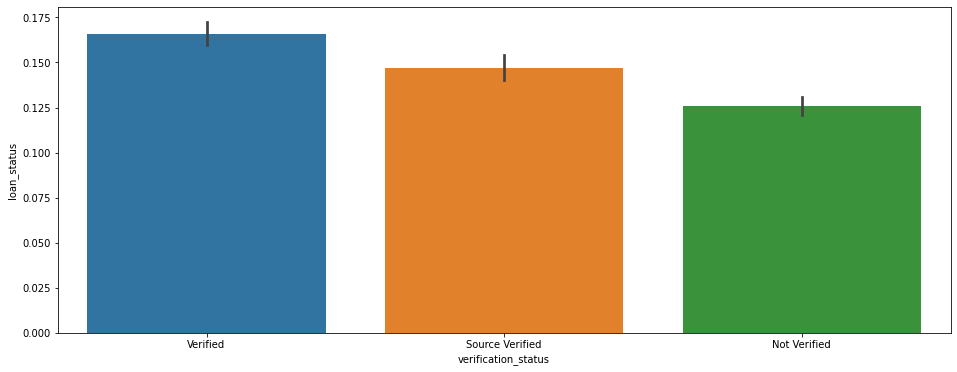

In [67]:
# plotting veriication status
plt.figure(figsize=(16, 6))
sns.barplot(x='verification_status', y='loan_status', data=Loan_df)
plt.show()

<AxesSubplot:xlabel='verification_status'>

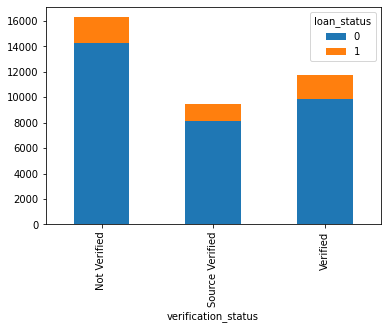

In [68]:
Loan_df.groupby('verification_status')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)

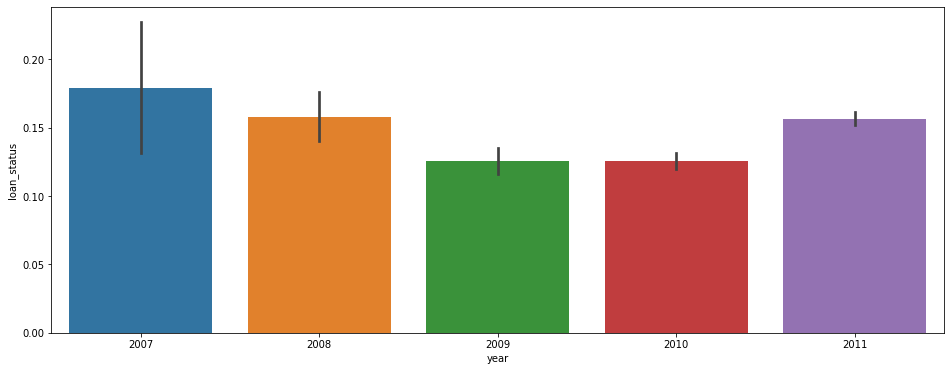

In [69]:
# plotting year
plt.figure(figsize=(16, 6))
sns.barplot(x='year', y='loan_status', data=Loan_df)
plt.show()

<AxesSubplot:xlabel='year'>

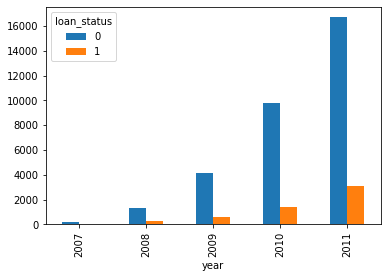

In [70]:
Loan_df.groupby('year')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=False)

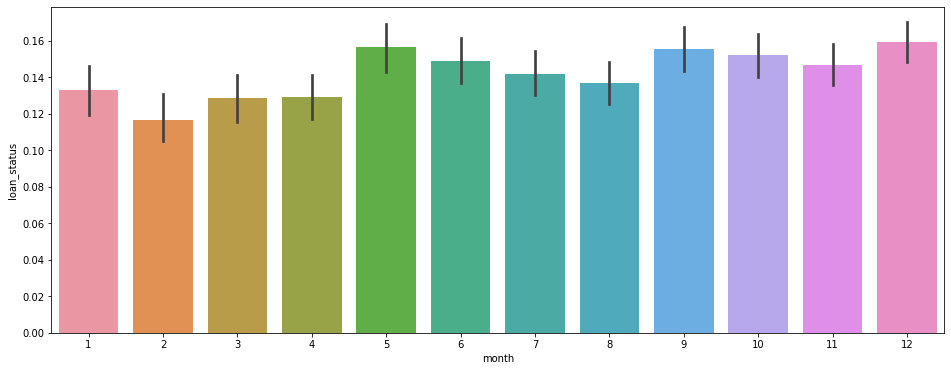

In [71]:
# plotting month
plt.figure(figsize=(16, 6))
sns.barplot(x='month', y='loan_status', data=Loan_df)
plt.show()

<AxesSubplot:xlabel='month'>

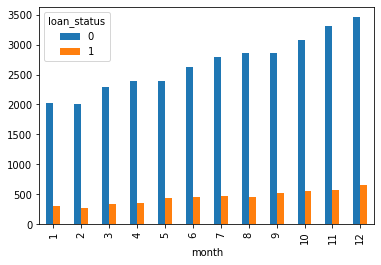

In [72]:
Loan_df.groupby('month')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=False)

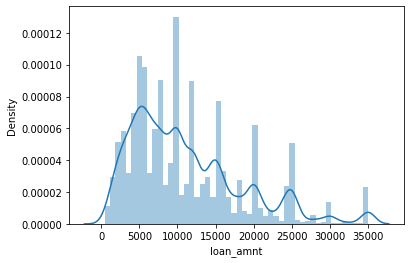

In [73]:
#plot normal distribution of loan amount
sns.distplot(Loan_df['loan_amnt'])
plt.show()

# Binning

In [74]:
# create bin for loan amount
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'

# convert interest rate to low, medium, high
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'

# creating bin for funded amount
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'


#creating bin for annual income
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

# binning the employment length
def emp_length(n):
    if n <= 1:
        return 'junior'
    elif n > 1 and n <=3:
        return 'mid-level'
    elif n > 3 and n <=7:
        return 'senior-level'
    else:
        return 'expert'


In [75]:
#implent binning function on columns
Loan_df['loan_amnt'] = Loan_df['loan_amnt'].apply(lambda x: loan_amount(x))
Loan_df['int_rate'] = Loan_df['int_rate'].apply(lambda x: int_rate(x))  
Loan_df['funded_amnt'] = Loan_df['funded_amnt'].apply(lambda x: funded_amount(x))
Loan_df['annual_inc'] = Loan_df['annual_inc'].apply(lambda x: annual_income(x))
Loan_df['emp_length'] = Loan_df['emp_length'].apply(lambda x: emp_length(x))

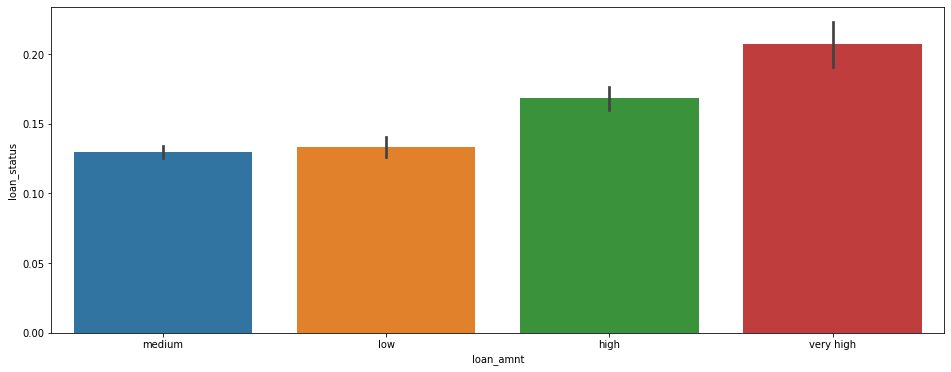

In [76]:
#plotting loan amount
plt.figure(figsize=(16, 6))
sns.barplot(x='loan_amnt', y='loan_status', data=Loan_df)
plt.show()

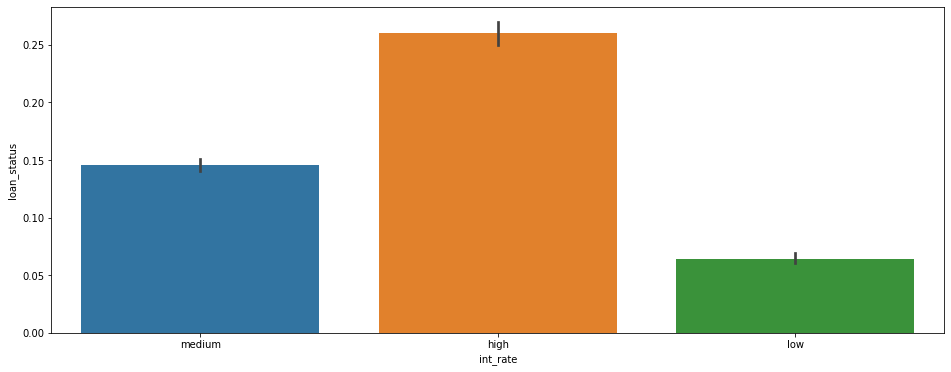

In [77]:
#plotting interst rate
plt.figure(figsize=(16, 6))
sns.barplot(x='int_rate', y='loan_status', data=Loan_df)
plt.show()

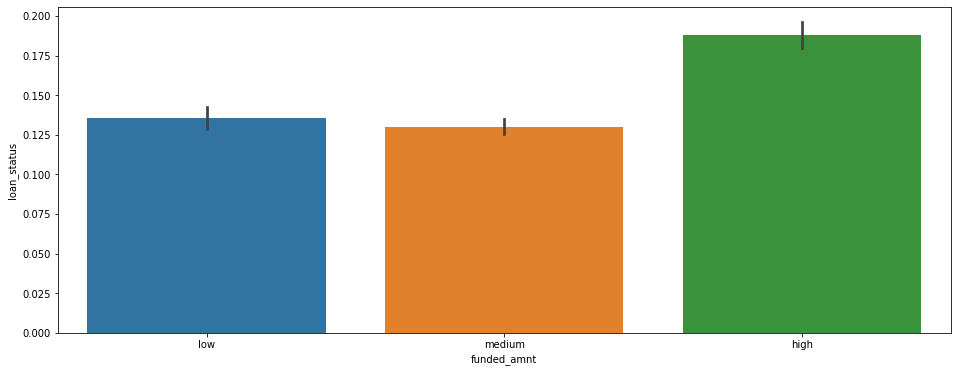

In [78]:
#plotting funded amount
plt.figure(figsize=(16, 6))
sns.barplot(x='funded_amnt', y='loan_status', data=Loan_df)
plt.show()

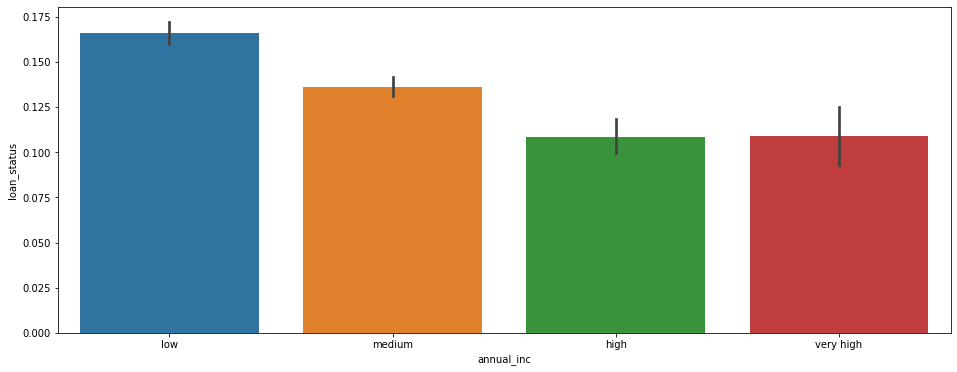

In [79]:
#plotting annual income
plt.figure(figsize=(16, 6))
sns.barplot(x='annual_inc', y='loan_status', data=Loan_df)
plt.show()

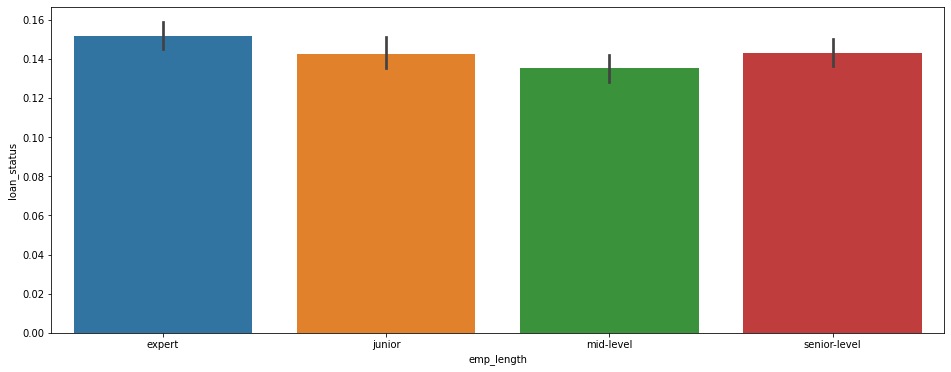

In [80]:
#plotting employment length
plt.figure(figsize=(16, 6))
sns.barplot(x='emp_length', y='loan_status', data=Loan_df)
plt.show()

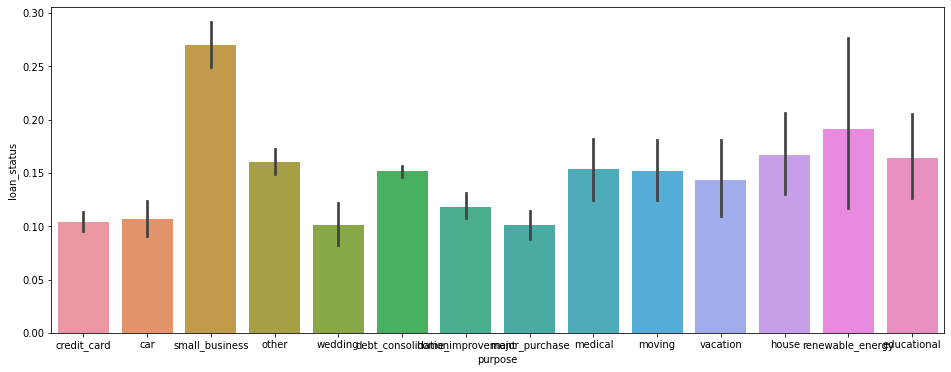

In [81]:
#Plotting puprpose
plt.figure(figsize=(16, 6))
sns.barplot(x='purpose', y='loan_status', data=Loan_df)
plt.show()

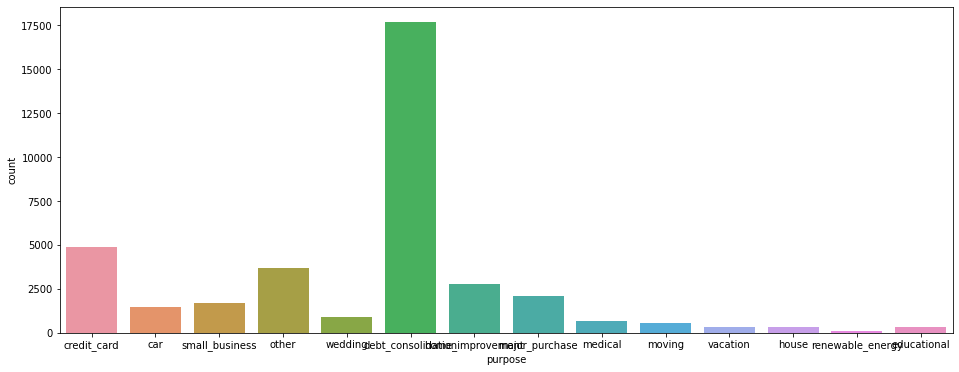

In [82]:
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=Loan_df)
plt.show()

In [83]:
# filtering the df for the top 5 types of loans except others : consolidation, credit card, home improvement, major purchase and small_business.
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase",'small_business']
Loan_df = Loan_df[Loan_df['purpose'].isin(main_purposes)]
Loan_df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
small_business         1710
Name: purpose, dtype: int64

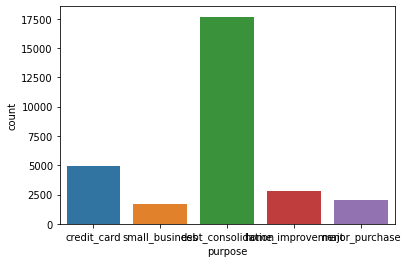

In [84]:
# plotting number of loans by purpose 
sns.countplot(x=Loan_df['purpose'])
plt.show()

#Segmented/Multivariate Analysis
##Columns:
### int_rate
### loan_amount
### funded_amount
### term
### home_ownership
### verification_status
### month
### year
### emp_length

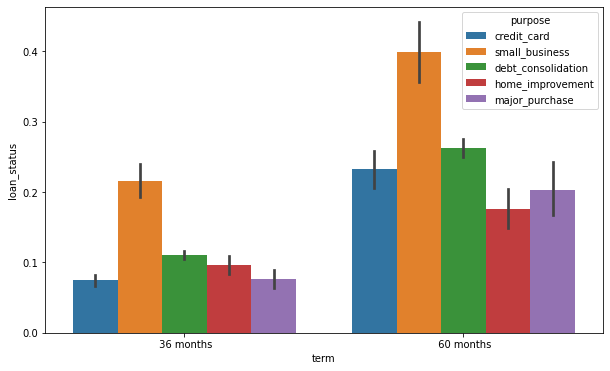

In [85]:
#segmented analysis of term on loan_status and purpose
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=Loan_df)
plt.show()

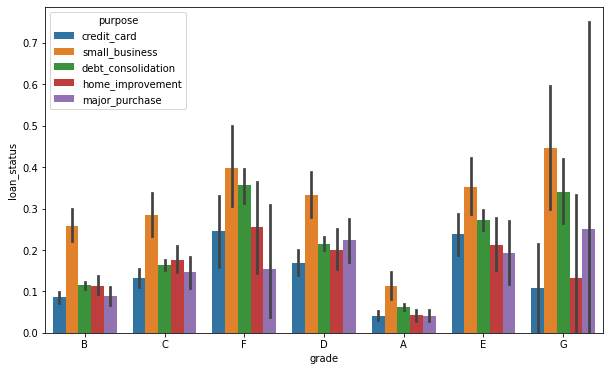

In [86]:
#segmented analysis of grade on loan_status and purpose
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='loan_status', hue='purpose', data=Loan_df)
plt.show()

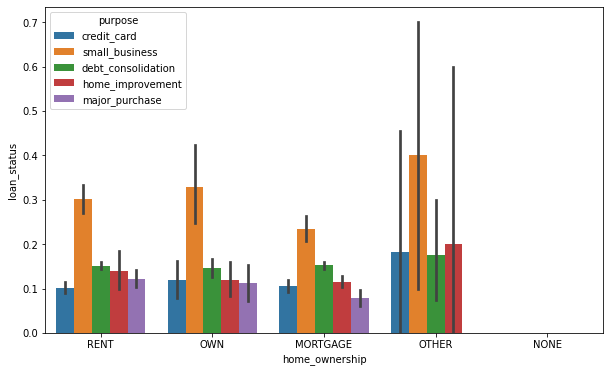

In [87]:
#segmented analysis of home ownership on loan_status and purpose
plt.figure(figsize=(10, 6))
sns.barplot(x='home_ownership', y='loan_status', hue='purpose', data=Loan_df)
plt.show()

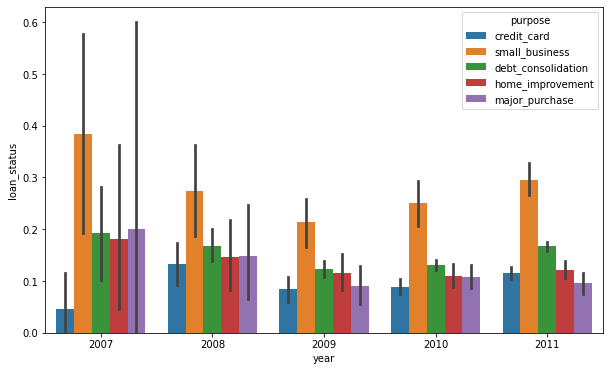

In [88]:
#segmented analysis of year on loan_status and purpose
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='loan_status', hue='purpose', data=Loan_df)
plt.show()

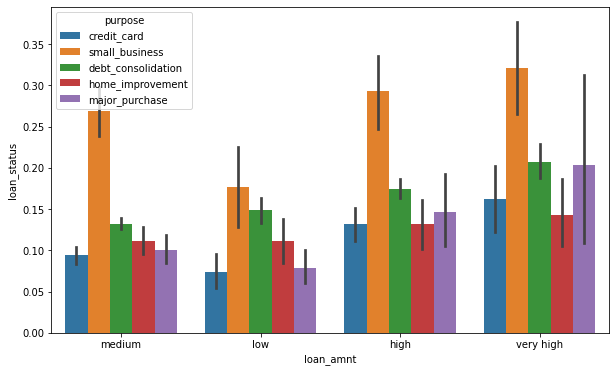

In [89]:
#segmented analysis of loan amount on loan_status and purpose
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt', y='loan_status', hue='purpose', data=Loan_df)
plt.show()

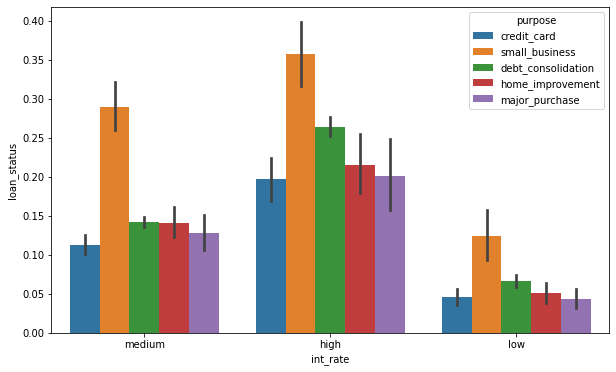

In [90]:
#segmented analysis of interst rate on loan_status and purpose
plt.figure(figsize=(10, 6))
sns.barplot(x='int_rate', y='loan_status', hue='purpose', data=Loan_df)
plt.show()

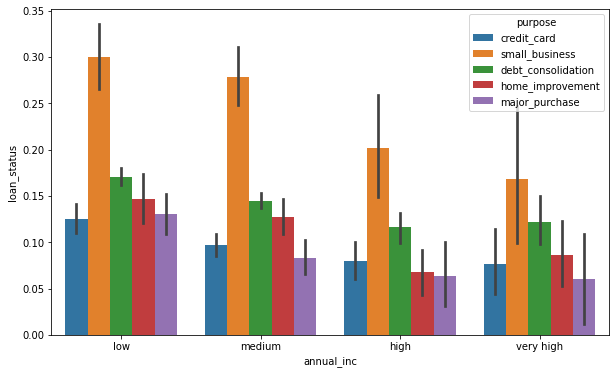

In [91]:
#segmented analysis of annual income on loan_status and purpose
plt.figure(figsize=(10, 6))
sns.barplot(x='annual_inc', y='loan_status', hue='purpose', data=Loan_df)
plt.show()

In [92]:
# function to predict laon_status variation among cateforical columsn
def diff_rate(cat_var):
    default_rates = Loan_df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.17
medium       0.14
very high    0.11
high         0.10
Name: loan_status, dtype: float64
0.06


In [95]:
# filtering all the object type variables
loan_categorical = Loan_df.loc[:, Loan_df.dtypes == object]
loan_categorical['loan_status'] = Loan_df['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in Loan_df.columns])

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'month', 'year']


In [97]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in loan_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 8.0, 'funded_amnt': 6.0, 'term': 15.0, 'int_rate': 20.0, 'grade': 28.000000000000004, 'sub_grade': 48.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 19.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 17.0, 'initial_list_status': 0.0}


In [98]:
analysis_keys = list(d.keys())
analysis_values = list(d.values())
analysis_df = pd.DataFrame({"Features": analysis_keys, "diff_of_default_rates": analysis_values}, columns= ['Features','diff_of_default_rates'])

In [99]:
analysis_df

,Features,diff_of_default_rates
0,loan_amnt,8.0
1,funded_amnt,6.0
2,term,15.0
3,int_rate,20.0
4,grade,28.0
5,sub_grade,48.0
6,emp_title,100.0
7,emp_length,2.0
8,home_ownership,19.0
9,annual_inc,6.0
